In [124]:
import os
import pyarrow.parquet as pq
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


abandoned_df = pq.read_table("Datasets_Zrive/abandoned_carts.parquet").to_pandas()
inventory_df = pq.read_table("Datasets_Zrive/inventory.parquet").to_pandas()
orders_df = pq.read_table("Datasets_Zrive/orders.parquet").to_pandas()
regulars_df = pq.read_table("Datasets_Zrive/regulars.parquet").to_pandas()
users_df = pq.read_table("Datasets_Zrive/users.parquet").to_pandas()

datasets = [abandoned_df, inventory_df, orders_df, regulars_df, users_df]

## Information about the datasets

In [71]:
for i in datasets:
    print(i.info())

<class 'pandas.core.frame.DataFrame'>
Index: 5457 entries, 0 to 70050
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          5457 non-null   int64         
 1   user_id     5457 non-null   object        
 2   created_at  5457 non-null   datetime64[us]
 3   variant_id  5457 non-null   object        
dtypes: datetime64[us](1), int64(1), object(2)
memory usage: 213.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1733 entries, 0 to 1732
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   variant_id        1733 non-null   int64  
 1   price             1733 non-null   float64
 2   compare_at_price  1733 non-null   float64
 3   vendor            1733 non-null   object 
 4   product_type      1733 non-null   object 
 5   tags              1733 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage

### Null values and value counts

In [125]:
for i in datasets:
    print(i.isna().sum())

id            0
user_id       0
created_at    0
variant_id    0
dtype: int64
variant_id          0
price               0
compare_at_price    0
vendor              0
product_type        0
tags                0
dtype: int64
id                0
user_id           0
created_at        0
order_date        0
user_order_seq    0
ordered_items     0
dtype: int64
user_id       0
variant_id    0
created_at    0
dtype: int64
user_id                     0
user_segment                0
user_nuts1                 51
first_ordered_at            0
customer_cohort_month       0
count_people             4658
count_adults             4658
count_children           4658
count_babies             4658
count_pets               4658
dtype: int64


In [130]:
users_df.head()

,user_id,user_segment,user_nuts1,first_ordered_at,customer_cohort_month,count_people,count_adults,count_children,count_babies,count_pets
2160,0e823a42e107461379e5b5613b7aa00537a72e1b0eaa7a...,Top Up,UKH,2021-05-08 13:33:49,2021-05-01 00:00:00,NaN,NaN,NaN,NaN,NaN
1123,15768ced9bed648f745a7aa566a8895f7a73b9a47c1d4f...,Top Up,UKJ,2021-11-17 16:30:20,2021-11-01 00:00:00,NaN,NaN,NaN,NaN,NaN
1958,33e0cb6eacea0775e34adbaa2c1dec16b9d6484e6b9324...,Top Up,UKD,2022-03-09 23:12:25,2022-03-01 00:00:00,NaN,NaN,NaN,NaN,NaN
675,57ca7591dc79825df0cecc4836a58e6062454555c86c35...,Top Up,UKI,2021-04-23 16:29:02,2021-04-01 00:00:00,NaN,NaN,NaN,NaN,NaN
4694,085d8e598139ce6fc9f75d9de97960fa9e1457b409ec00...,Top Up,UKJ,2021-11-02 13:50:06,2021-11-01 00:00:00,NaN,NaN,NaN,NaN,NaN


In [127]:
users_df.user_nuts1.value_counts()

user_nuts1
UKI    1318
UKJ     745
UKK     602
UKH     414
UKD     358
UKM     315
UKE     303
UKG     295
UKF     252
UKL     224
UKC     102
UKN       4
Name: count, dtype: int64

In [128]:
users_df.count_people.value_counts()

count_people
2.0    97
3.0    68
4.0    67
1.0    57
5.0    24
6.0     8
0.0     2
7.0     1
8.0     1
Name: count, dtype: int64

In [132]:
users_df[users_df['count_adults'].notnull()].head()

,user_id,user_segment,user_nuts1,first_ordered_at,customer_cohort_month,count_people,count_adults,count_children,count_babies,count_pets
4751,09d70e0b0778117aec5550c08032d56f8e06f992741680...,Proposition,UKI,2021-06-28 12:07:04,2021-06-01 00:00:00,1.0,1.0,0.0,0.0,0.0
3154,4f5ff38ce5ed48096ba80dff80e167db1ad24b9ebdb00c...,Top Up,UKD,2020-06-12 12:07:35,2020-06-01 00:00:00,3.0,2.0,0.0,1.0,0.0
736,7b2ae50bb11646436fa613394fc3e71e1a0cdc3ba30cdb...,Proposition,UKF,2020-10-03 09:53:57,2020-10-01 00:00:00,2.0,2.0,0.0,0.0,2.0
4792,5e977a4aa2c57f306b8a22f92eaaa177f7dc31a52df82c...,Proposition,UKI,2021-10-14 10:41:13,2021-10-01 00:00:00,2.0,1.0,1.0,0.0,1.0
2217,eafb89ad33eb377adb98a915b6a5a65f1284c2db517d07...,Proposition,UKH,2022-01-20 15:53:09,2022-01-01 00:00:00,2.0,2.0,0.0,0.0,0.0


In [74]:
users_df[users_df['user_nuts1'].isnull()].head()

,user_id,user_segment,user_nuts1,first_ordered_at,customer_cohort_month,count_people,count_adults,count_children,count_babies,count_pets
1145,8afa3289c56fd4225f42bd3427615204eca9fea9e46261...,Top Up,None,2021-09-27 16:42:50,2021-09-01 00:00:00,NaN,NaN,NaN,NaN,NaN
1858,361235e2decd78440db688cc8ca0abf6ec6725dd5a2e6c...,Proposition,None,2021-11-26 13:19:47,2021-11-01 00:00:00,NaN,NaN,NaN,NaN,NaN
3884,e99c9a29e3d1fc49649568cc5625a23b2aa8e3a4577527...,Top Up,None,2022-02-21 12:50:19,2022-02-01 00:00:00,NaN,NaN,NaN,NaN,NaN
4573,e5ff40c78b3cdcf2b10c9dc69e5e893d95246741300f26...,Proposition,None,2020-05-30 13:28:27,2020-05-01 00:00:00,4.0,3.0,1.0,0.0,2.0
12992,b34e8a5c1464868734143e3e3b49d951e8dc7efb346852...,Proposition,None,2021-05-23 17:56:47,2021-05-01 00:00:00,NaN,NaN,NaN,NaN,NaN


In [72]:
orders_df.head()

,id,user_id,created_at,order_date,user_order_seq,ordered_items
10,2204073066628,62e271062eb827e411bd73941178d29b022f5f2de9d37f...,2020-04-30 14:32:19,2020-04-30,1,"[33618849693828, 33618860179588, 3361887404045..."
20,2204707520644,bf591c887c46d5d3513142b6a855dd7ffb9cc00697f6f5...,2020-04-30 17:39:00,2020-04-30,1,"[33618835243140, 33618835964036, 3361886244058..."
21,2204838822020,329f08c66abb51f8c0b8a9526670da2d94c0c6eef06700...,2020-04-30 18:12:30,2020-04-30,1,"[33618891145348, 33618893570180, 3361889766618..."
34,2208967852164,f6451fce7b1c58d0effbe37fcb4e67b718193562766470...,2020-05-01 19:44:11,2020-05-01,1,"[33618830196868, 33618846580868, 3361891234624..."
49,2215889436804,68e872ff888303bff58ec56a3a986f77ddebdbe5c279e7...,2020-05-03 21:56:14,2020-05-03,1,"[33667166699652, 33667166699652, 3366717122163..."


In [73]:
regulars_df.head()

,user_id,variant_id,created_at
3,68e872ff888303bff58ec56a3a986f77ddebdbe5c279e7...,33618848088196,2020-04-30 15:07:03
11,aed88fc0b004270a62ff1fe4b94141f6b1db1496dbb0c0...,33667178659972,2020-05-05 23:34:35
18,68e872ff888303bff58ec56a3a986f77ddebdbe5c279e7...,33619009208452,2020-04-30 15:07:03
46,aed88fc0b004270a62ff1fe4b94141f6b1db1496dbb0c0...,33667305373828,2020-05-05 23:34:35
47,4594e99557113d5a1c5b59bf31b8704aafe5c7bd180b32...,33667247341700,2020-05-06 14:42:11


In [75]:
# As we are only getting rid of 51 entries and there is no apparent bias in the null values we can remove them.
users_df = users_df.dropna(subset=['user_nuts1'])

In [76]:
regulars_df.variant_id.value_counts()

variant_id
34081589887108    253
34370361229444    127
33973249081476    114
34370915041412    112
34284951863428    105
                 ... 
39544243552388      1
39478260826244      1
39711187894404      1
39272601452676      1
39459281010820      1
Name: count, Length: 1843, dtype: int64

## Product Analysis


First, we want to create a table that includes for every item (Variant ID) how many times it has been ordered, registered as regular and abandoned in a basket. For this we use a function that takes the ordered items field and transforms it, into a value count for each item and column.

In [77]:

def value_count_to_df(items: pd.DataFrame) -> pd.DataFrame:
    items = items.to_numpy()
    count_orders = {}
    for i in items:
        for j in i:
            if j in count_orders:
                count_orders[j] += 1
            else:
                count_orders[j] = 1

    return pd.DataFrame(list(count_orders.items()), columns=['variant_id','count'])


count_orders_df = value_count_to_df(orders_df['ordered_items']).rename(columns={'count': 'Count_Orders'})
count_abandoned_orders_df = value_count_to_df(abandoned_df['variant_id']).rename(columns={'count': 'Count_Abandoned_Orders'})


In [79]:
regulars_value_counts = pd.DataFrame(regulars_df.variant_id.value_counts()).rename(columns={'count': 'Count_Regulars'})

orders_summary_df = count_orders_df.merge(regulars_value_counts, on='variant_id', how='left')
orders_summary_df = orders_summary_df.merge(count_abandoned_orders_df, on='variant_id', how='left')
orders_summary_df.fillna(0,inplace=True)

#We merge the data from the inventory and we change the datatypes
orders_summary_df = orders_summary_df.merge(inventory_df, on='variant_id', how='left')
orders_summary_df.sort_values(by='Count_Orders',ascending=False,inplace=True)
orders_summary_df.reset_index(drop=True, inplace=True)
orders_summary_df['Count_Regulars'] = orders_summary_df['Count_Regulars'].astype('int16')
orders_summary_df['Count_Abandoned_Orders'] = orders_summary_df['Count_Abandoned_Orders'].astype('int16')
orders_summary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2117 entries, 0 to 2116
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   variant_id              2117 non-null   int64  
 1   Count_Orders            2117 non-null   int64  
 2   Count_Regulars          2117 non-null   int16  
 3   Count_Abandoned_Orders  2117 non-null   int16  
 4   price                   1477 non-null   float64
 5   compare_at_price        1477 non-null   float64
 6   vendor                  1477 non-null   object 
 7   product_type            1477 non-null   object 
 8   tags                    1477 non-null   object 
dtypes: float64(2), int16(2), int64(2), object(3)
memory usage: 124.2+ KB


### Correlation matrix

THe following matrix shows how the number of sales of an item it is correlated with the number of times it was stored as a regular item and abandoned. This is quite intuitive and I would be more concerned if it didn't. 

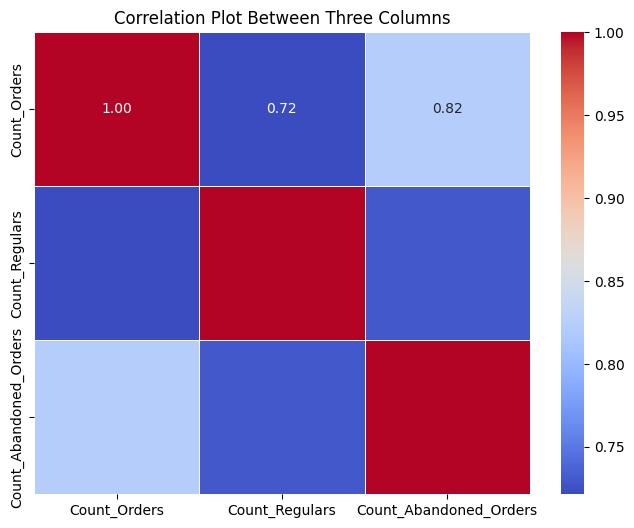

In [80]:
correlation_matrix = orders_summary_df.iloc[:,1:4].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5, fmt=".2f")
plt.title('Correlation Plot Between Three Columns')
plt.show()

In [81]:
#Most items are missing in the inventory
orders_summary_df.head()

,variant_id,Count_Orders,Count_Regulars,Count_Abandoned_Orders,price,compare_at_price,vendor,product_type,tags
0,34081589887108,4487,253,608,10.79,11.94,oatly,long-life-milk-substitutes,"[oat-milk, vegan]"
1,39284117930116,2658,30,298,NaN,NaN,NaN,NaN,NaN
2,34137590366340,1459,30,395,NaN,NaN,NaN,NaN,NaN
3,34081331970180,1170,41,99,NaN,NaN,NaN,NaN,NaN
4,34284951863428,1133,105,478,3.69,3.99,plenty,toilet-roll-kitchen-roll-tissue,[kitchen-roll]


In [82]:
#Number of orders by year
orders_df['year'] = orders_df['order_date'].dt.year
orders_df.groupby(by='year').count()

,id,user_id,created_at,order_date,user_order_seq,ordered_items
year,,,,,,
2020,740,740,740,740,740,740
2021,5784,5784,5784,5784,5784,5784
2022,2249,2249,2249,2249,2249,2249


In [83]:
orders_summary_df.dropna()

,variant_id,Count_Orders,Count_Regulars,Count_Abandoned_Orders,price,compare_at_price,vendor,product_type,tags
0,34081589887108,4487,253,608,10.79,11.94,oatly,long-life-milk-substitutes,"[oat-milk, vegan]"
4,34284951863428,1133,105,478,3.69,3.99,plenty,toilet-roll-kitchen-roll-tissue,[kitchen-roll]
5,34284950356100,954,94,409,1.99,3.00,fairy,dishwashing,"[discontinue, swapped, washing-up-liquid]"
6,34370361229444,939,127,253,4.99,5.50,whogivesacrap,toilet-roll-kitchen-roll-tissue,"[b-corp, eco, toilet-rolls]"
7,33826465153156,884,63,216,1.89,1.99,clearspring,tins-packaged-foods,"[gluten-free, meat-alternatives, vegan]"
...,...,...,...,...,...,...,...,...,...
2097,33826416623748,1,0,0,9.99,14.15,beamingbaby,nappies-nappy-pants,"[discontinue, eco, sizes-0-1-2-newborn, vegan]"
2110,34537144123524,1,0,2,2.49,3.25,piccolo,baby-toddler-food,"[discontinue, home-cooking, organic, stage-3-1..."
2111,39367712866436,1,0,0,12.99,13.00,gillette,shaving-grooming,[razors-blades]
2113,39686337790084,1,0,0,4.59,4.68,sudafed,medicines-treatments,"[cough-cold, pain-relief]"


### Summary of sales data

In [84]:
orders_summary_df['revenue'] = orders_summary_df['Count_Orders'] * orders_summary_df['price']
orders_summary_df.groupby(by ='vendor')['revenue'].sum().sort_values(ascending=False)

vendor
oatly          56344.15
ecover         25014.45
persil         21307.60
fairy          19244.12
method         13923.57
                 ...   
difatti           10.25
beamingbaby        9.99
natracare          9.16
sudafed            4.59
attitude           3.79
Name: revenue, Length: 402, dtype: float64

/Users/alvarodda/Library/Caches/pypoetry/virtualenvs/zrive-ds-hgGXxKZy-py3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/alvarodda/Library/Caches/pypoetry/virtualenvs/zrive-ds-hgGXxKZy-py3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/alvarodda/Library/Caches/pypoetry/virtualenvs/zrive-ds-hgGXxKZy-py3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/alvarodda/Library/Caches/pypoetry

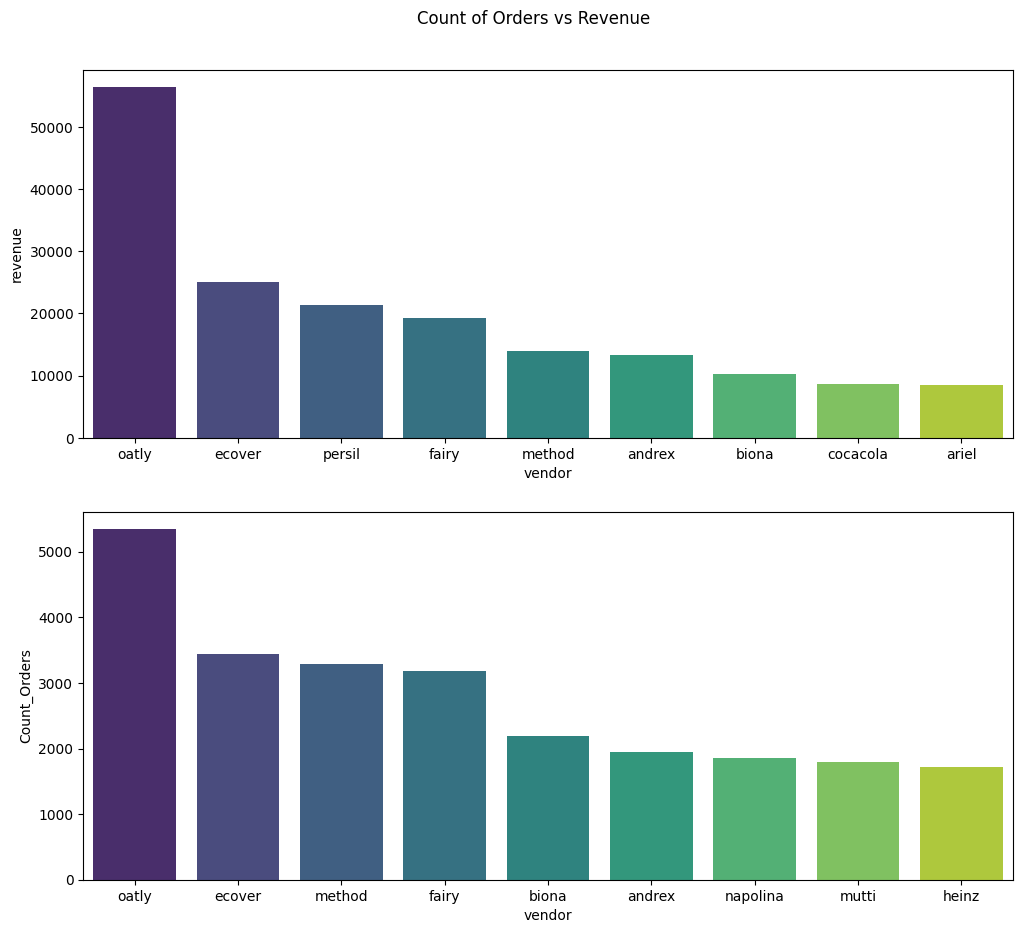

In [145]:
grouped_data_revenue = orders_summary_df.groupby(by='vendor')['revenue'].sum().sort_values(ascending=False).reset_index()[:9]
grouped_data_orders = orders_summary_df.groupby(by='vendor')['Count_Orders'].sum().sort_values(ascending=False).reset_index()[:9]

fig, axes = plt.subplots(2, 1, figsize=(12, 10))

sns.barplot(x='vendor', y='revenue', data = grouped_data_revenue, ax=axes[0], palette= 'viridis')
sns.barplot(x='vendor', y='Count_Orders', data = grouped_data_orders, ax=axes[1], palette = 'viridis')

plt.suptitle('Count of Orders vs Revenue', fontsize=12)
plt.subplots_adjust(top=0.92)


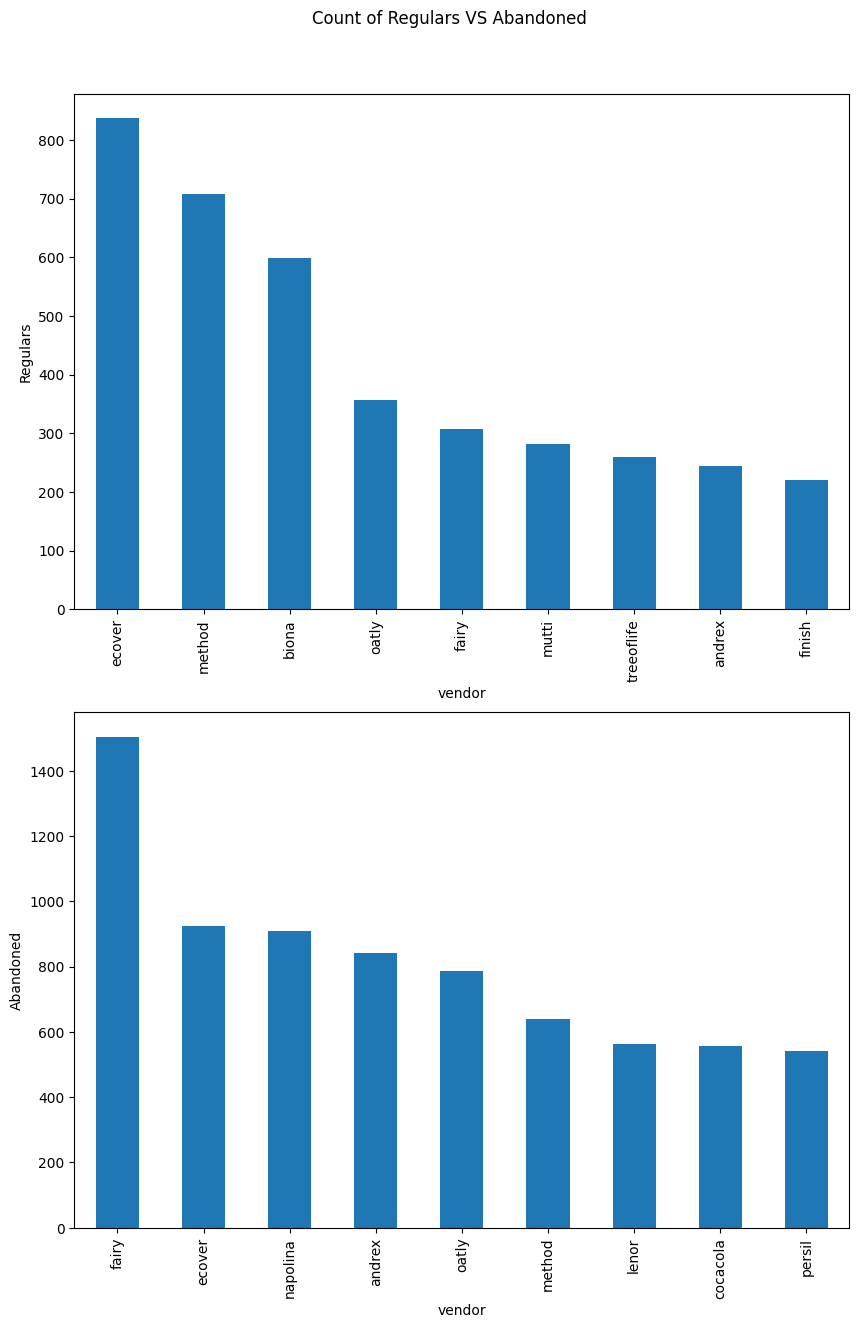

In [150]:

fig, axes = plt.subplots(2, 1, figsize=(10, 14))

orders_summary_df.groupby(by ='vendor')['Count_Regulars'].sum().sort_values(ascending=False)[:9].plot(kind='bar', ax=axes[0],ylabel='Regulars')
orders_summary_df.groupby(by ='vendor')['Count_Abandoned_Orders'].sum().sort_values(ascending=False)[:9].plot(kind='bar',  ax=axes[1],ylabel='Abandoned')

plt.suptitle('Count of Regulars VS Abandoned', fontsize=12)
plt.subplots_adjust(top=0.92)

### Ranking Items by Performance

The idea is to take every item that has been sold more than 100 times to not have a small sample size, and then ranking them based on how many times it has been saved as regular and how many times it has been discarted. We will calculate this final rank as the average between both ranks. For the ranks we will calculate the percentage of count regulars and abandoned orders with respect to the number of times it has been sold (Count_Orders).


In [94]:
def perc_of_orders(row, column):
    return row[column] / row['Count_Orders']

orders_summary_df['perc_regulars_of_orders'] = orders_summary_df.apply(perc_of_orders, axis=1, args=('Count_Regulars',))
orders_summary_df['perc_abandoned_of_orders'] = orders_summary_df.apply(perc_of_orders, axis=1, args=('Count_Abandoned_Orders',))

Best performing Items with respect to the number of times they have been saved as regulars

In [151]:
orders_summary_df[orders_summary_df['Count_Orders']>100].sort_values(by='perc_regulars_of_orders',ascending=False).head()

,variant_id,Count_Orders,Count_Regulars,Count_Abandoned_Orders,price,compare_at_price,vendor,product_type,tags,revenue,perc_regulars_of_orders,perc_abandoned_of_orders,Rank_abandoned
261,34081589624964,104,44,0,NaN,NaN,NaN,NaN,NaN,NaN,0.423077,0.000000,320.5
266,34276569251972,103,37,26,2.49,2.70,meridian,cooking-sauces,"[cooking-pastes, gluten-free, vegan]",256.47,0.359223,0.252427,1146.0
61,34436055302276,243,85,74,3.29,4.35,marmite,spreads,"[savoury-spreads, vegan]",799.47,0.349794,0.304527,1283.0
72,33667247407236,221,74,32,3.49,3.50,method,cleaning-products,"[all-purpose-cleaner, cruelty-free, eco, vegan]",771.29,0.334842,0.144796,816.0
192,33667198910596,123,41,35,14.99,16.55,ecover,dishwashing,"[cruelty-free, dishwasher-tablets, eco, vegan]",1843.77,0.333333,0.284553,1237.0


Best performing items with respect to the number of times they have been abandoned before buying them.

In [152]:
orders_summary_df[orders_summary_df['Count_Orders']>100].sort_values(by='perc_abandoned_of_orders',ascending=True).head()

,variant_id,Count_Orders,Count_Regulars,Count_Abandoned_Orders,price,compare_at_price,vendor,product_type,tags,revenue,perc_regulars_of_orders,perc_abandoned_of_orders,Rank_abandoned
209,33977922650244,118,32,0,NaN,NaN,NaN,NaN,NaN,NaN,0.271186,0.0,320.5
256,33667263627396,106,16,0,NaN,NaN,NaN,NaN,NaN,NaN,0.150943,0.0,320.5
69,39459281404036,223,1,0,NaN,NaN,NaN,NaN,NaN,NaN,0.004484,0.0,320.5
95,39462593233028,190,4,0,NaN,NaN,NaN,NaN,NaN,NaN,0.021053,0.0,320.5
135,39459279110276,155,4,0,4.39,4.47,ecoforce,cleaning-products,"[eco, sponges-cloths-gloves]",680.45,0.025806,0.0,320.5


In [121]:
shrinked_orders = orders_summary_df.loc[orders_summary_df['Count_Orders']>100].copy()

shrinked_orders['Rank_abandoned'] = shrinked_orders['perc_abandoned_of_orders'].rank(method='min')
shrinked_orders['Rank_regulars'] = shrinked_orders['perc_regulars_of_orders'].rank(method='min', ascending = False)

shrinked_orders['Final_Score']= (shrinked_orders['Rank_abandoned'] + shrinked_orders['Rank_regulars']) / 2

### Final Scores

Best performing items

In [153]:
shrinked_orders.sort_values(by='Final_Score').head()

,variant_id,Count_Orders,Count_Regulars,Count_Abandoned_Orders,price,compare_at_price,vendor,product_type,tags,revenue,perc_regulars_of_orders,perc_abandoned_of_orders,Rank_abandoned,Rank_regulars,Final_Score
261,34081589624964,104,44,0,NaN,NaN,NaN,NaN,NaN,NaN,0.423077,0.0,1.0,1.0,1.0
182,33667283648644,128,42,0,NaN,NaN,NaN,NaN,NaN,NaN,0.328125,0.0,1.0,7.0,4.0
153,34370917204100,144,44,0,NaN,NaN,NaN,NaN,NaN,NaN,0.305556,0.0,1.0,11.0,6.0
209,33977922650244,118,32,0,NaN,NaN,NaN,NaN,NaN,NaN,0.271186,0.0,1.0,25.0,13.0
213,33826477834372,117,29,0,NaN,NaN,NaN,NaN,NaN,NaN,0.247863,0.0,1.0,36.0,18.5


Worst performing items

In [154]:
shrinked_orders.sort_values(by='Final_Score').tail()

,variant_id,Count_Orders,Count_Regulars,Count_Abandoned_Orders,price,compare_at_price,vendor,product_type,tags,revenue,perc_regulars_of_orders,perc_abandoned_of_orders,Rank_abandoned,Rank_regulars,Final_Score
142,39536607395972,150,11,98,4.29,5.34,sanpellegrino,soft-drinks-mixers,[fizzy-drinks],643.50,0.073333,0.653333,272.0,206.0,239.0
89,39544243650692,200,10,98,9.49,12.99,pepsi,soft-drinks-mixers,"[fizzy-drinks, pm, vegan]",1898.00,0.050000,0.490000,254.0,233.0,243.5
227,39709997826180,113,6,83,9.49,10.29,cocacola,soft-drinks-mixers,"[fizzy-drinks, gluten-free, vegan]",1072.37,0.053097,0.734513,274.0,230.0,252.0
208,39309575356548,118,5,73,15.49,17.99,smirnoff,spirits-liqueurs,"[gluten-free, spirits-liqueurs]",1827.82,0.042373,0.618644,271.0,238.0,254.5
40,39709997858948,323,12,197,9.49,10.29,cocacola,soft-drinks-mixers,"[fizzy-drinks, gluten-free, vegan]",3065.27,0.037152,0.609907,270.0,247.0,258.5


Best and worst performing items where inventory information is not missing

In [123]:
shrinked_orders.sort_values(by='Final_Score').dropna()

,variant_id,Count_Orders,Count_Regulars,Count_Abandoned_Orders,price,compare_at_price,vendor,product_type,tags,revenue,perc_regulars_of_orders,perc_abandoned_of_orders,Rank_abandoned,Rank_regulars,Final_Score
218,33667247243396,115,38,15,3.49,3.50,method,cleaning-products,"[all-purpose-cleaner, cruelty-free, eco, vegan]",401.35,0.330435,0.130435,48.0,6.0,27.0
72,33667247407236,221,74,32,3.49,3.50,method,cleaning-products,"[all-purpose-cleaner, cruelty-free, eco, vegan]",771.29,0.334842,0.144796,56.0,4.0,30.0
231,33667247538308,112,33,13,2.49,3.00,method,hand-soap-sanitisers,"[cruelty-free, eco, hand-soap, vegan]",278.88,0.294643,0.116071,43.0,18.0,30.5
206,33667247341700,118,36,16,3.49,3.50,method,cleaning-products,"[cruelty-free, eco, vegan, window-glass-cleaner]",411.82,0.305085,0.135593,53.0,13.0,33.0
158,39459277734020,142,36,15,2.99,3.00,biona,tins-packaged-foods,"[organic, pasta-pizza-sauce, tinned-tomatoes-p...",424.58,0.253521,0.105634,36.0,31.0,33.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,39536607395972,150,11,98,4.29,5.34,sanpellegrino,soft-drinks-mixers,[fizzy-drinks],643.50,0.073333,0.653333,272.0,206.0,239.0
89,39544243650692,200,10,98,9.49,12.99,pepsi,soft-drinks-mixers,"[fizzy-drinks, pm, vegan]",1898.00,0.050000,0.490000,254.0,233.0,243.5
227,39709997826180,113,6,83,9.49,10.29,cocacola,soft-drinks-mixers,"[fizzy-drinks, gluten-free, vegan]",1072.37,0.053097,0.734513,274.0,230.0,252.0
208,39309575356548,118,5,73,15.49,17.99,smirnoff,spirits-liqueurs,"[gluten-free, spirits-liqueurs]",1827.82,0.042373,0.618644,271.0,238.0,254.5
